In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [161]:
car=pd.read_csv('cardata.csv')

In [162]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [163]:
car.shape

(301, 9)

In [164]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##### Creating backup copy

In [165]:
backup=car.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data

#### year has many non-year values

In [166]:
car = car[car['Year'].astype(str).str.isnumeric()]


#### year is in object. Change to integer

In [167]:
car['Year']=car['Year'].astype(int)

#### Price has Ask for Price

In [168]:
car = car[~car['Selling_Price'].isin(['Ask For Price'])]


#### Price has commas in its prices and is in object

In [169]:
car['Selling_Price'] = car['Selling_Price'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float).astype(int)


####  kms_driven has object values with kms at last.

In [170]:
car['Driven_kms'] = car['Driven_kms'].astype(str).str.split().str.get(0).str.replace(',', '', regex=False)


#### It has nan values and two rows have 'Petrol' in them

In [171]:
car=car[car['Driven_kms'].str.isnumeric()]

In [172]:
car['Driven_kms']=car['Driven_kms'].astype(int)

#### fuel_type has nan values

In [173]:
car=car[~car['Fuel_Type'].isna()]

In [174]:
car.shape

(301, 9)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [175]:
car['Car_Name']=car['Car_Name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [176]:
car=car.reset_index(drop=True)

## Cleaned Data

In [177]:
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11,12.50,9000,Diesel,Dealer,Manual,0


In [210]:
car.to_csv('cardata.csv')

In [211]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    int64  
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 21.3+ KB


In [212]:
car.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,91,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.215947,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.098681,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.000000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.000000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.000000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [213]:
car=car[car['Selling_Price']<6000000]

### Checking relationship of Company with Price

In [214]:
car['Owner'].unique()

array([0, 1, 3])

In [215]:
import seaborn as sns

<ipython-input-216-96cabcb34651>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


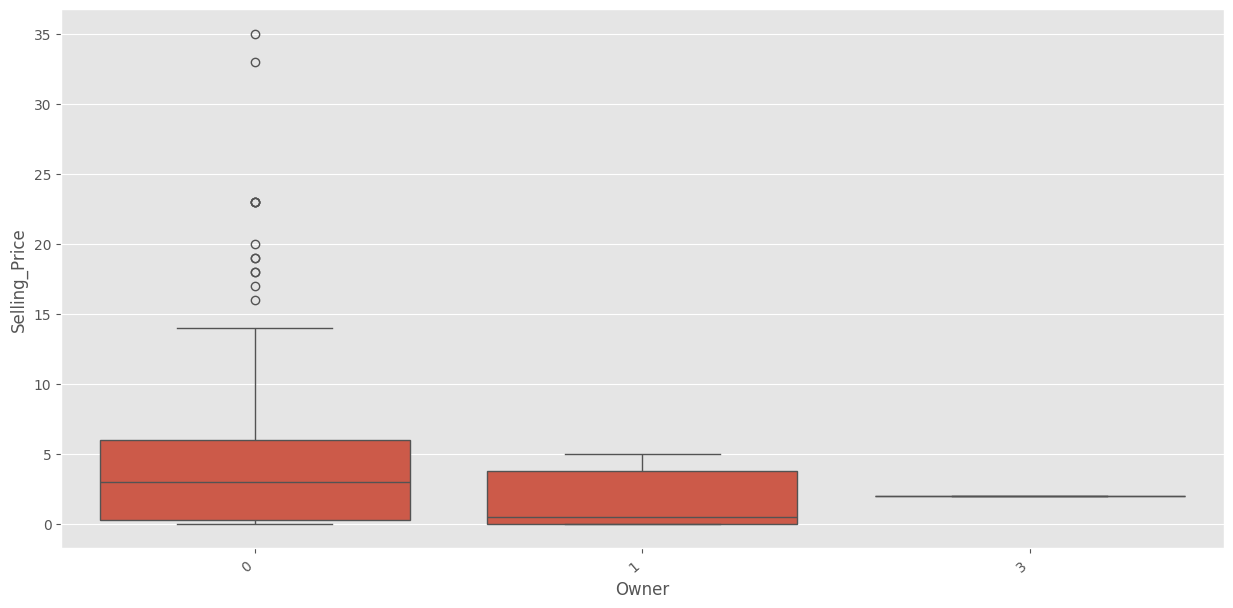

In [216]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Owner',y='Selling_Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

<ipython-input-217-74a0eac8a942>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


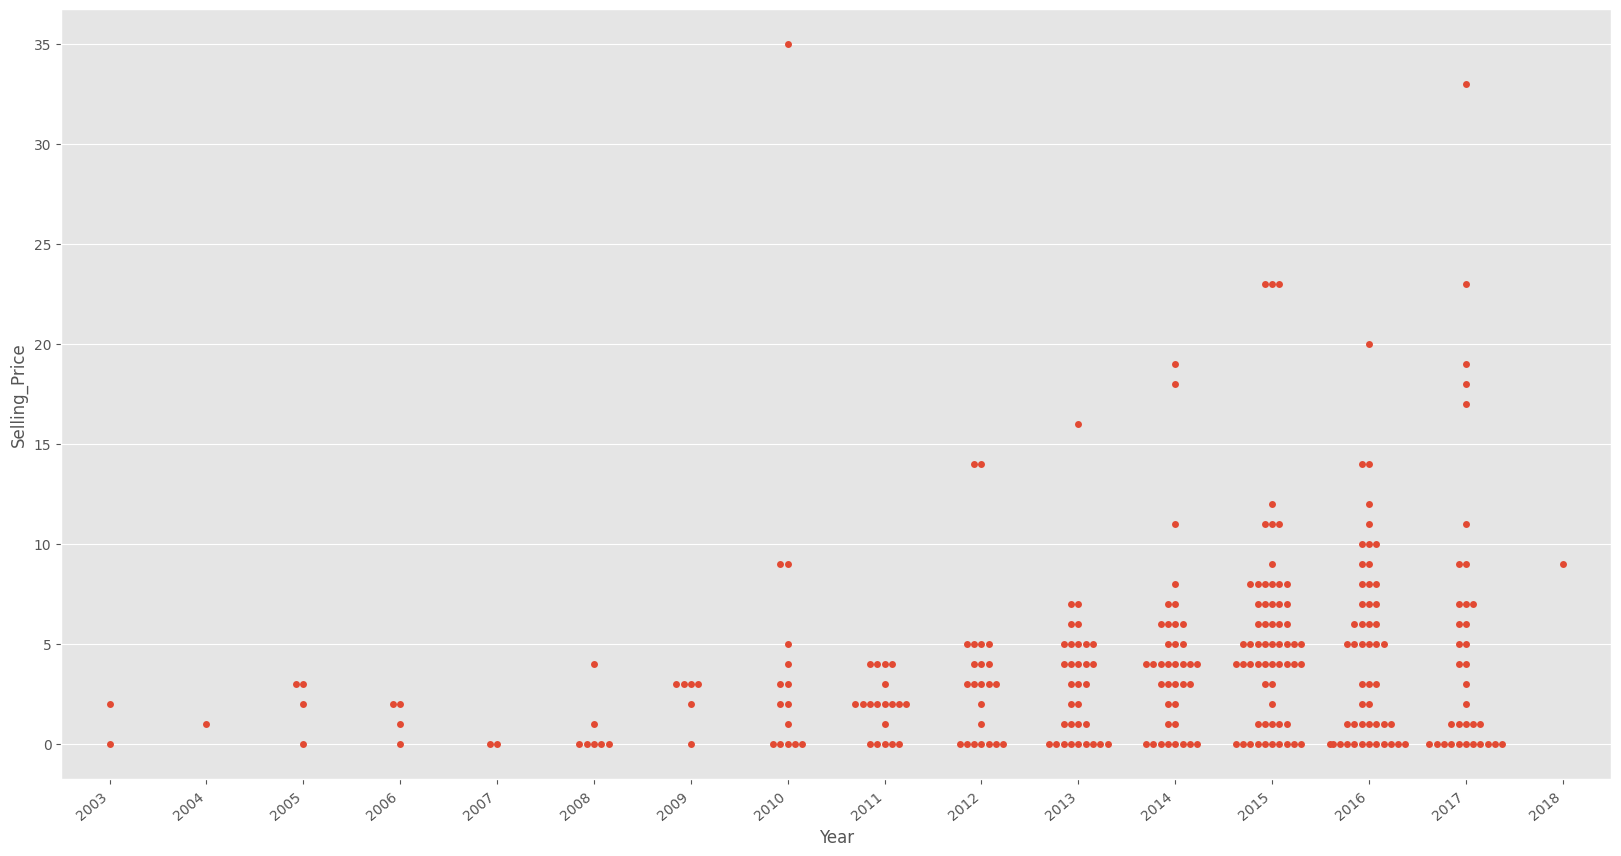

In [217]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Selling_Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

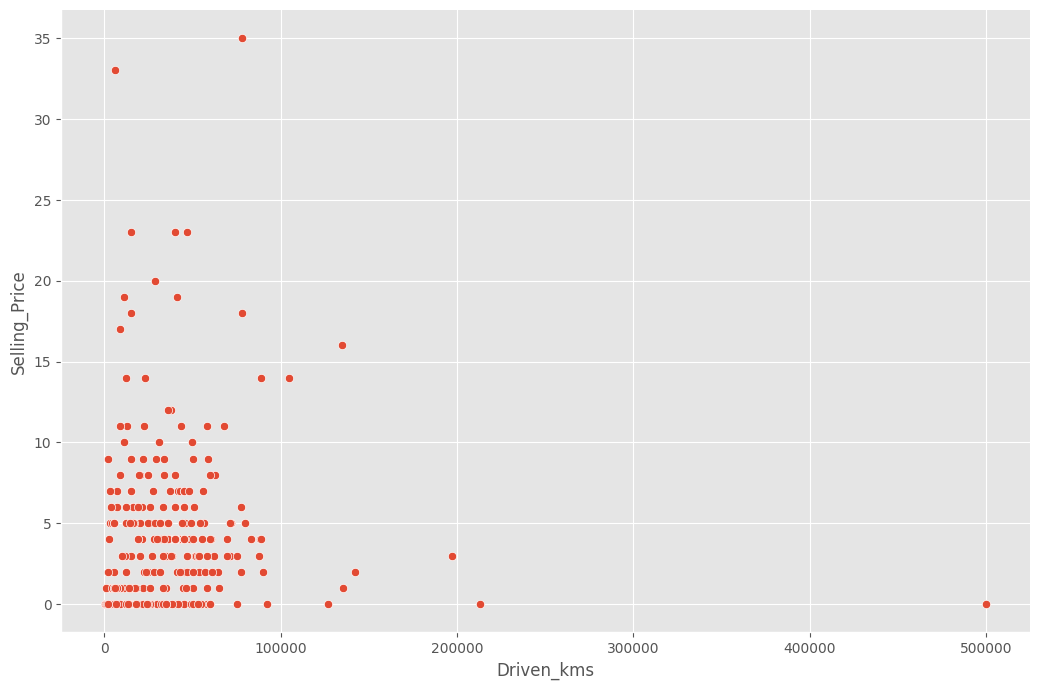

In [218]:
sns.relplot(x='Driven_kms',y='Selling_Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

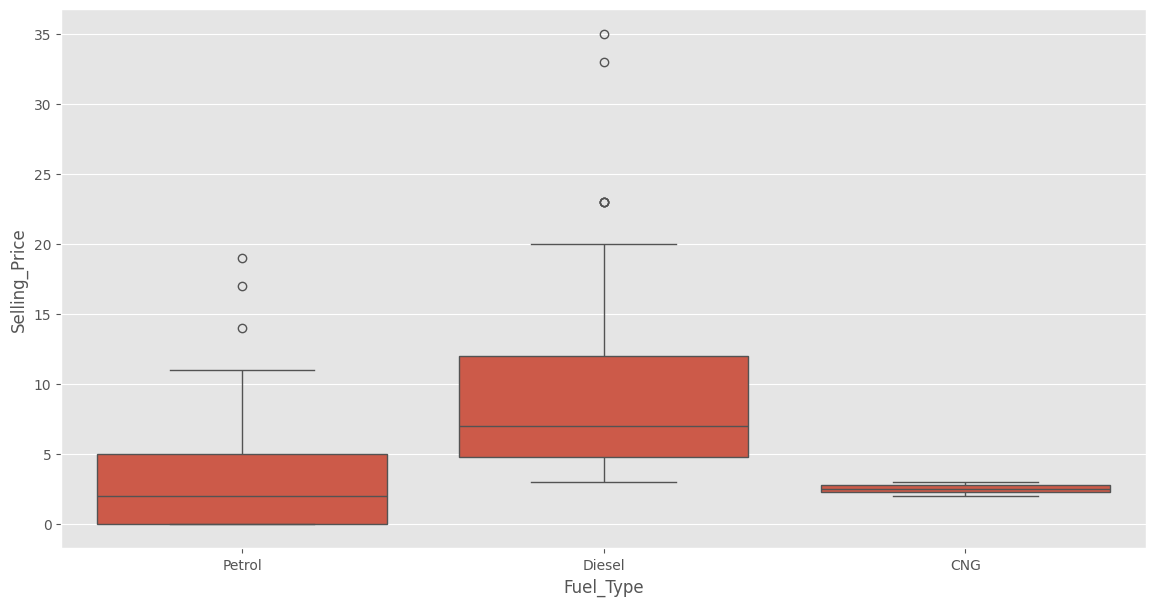

In [219]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

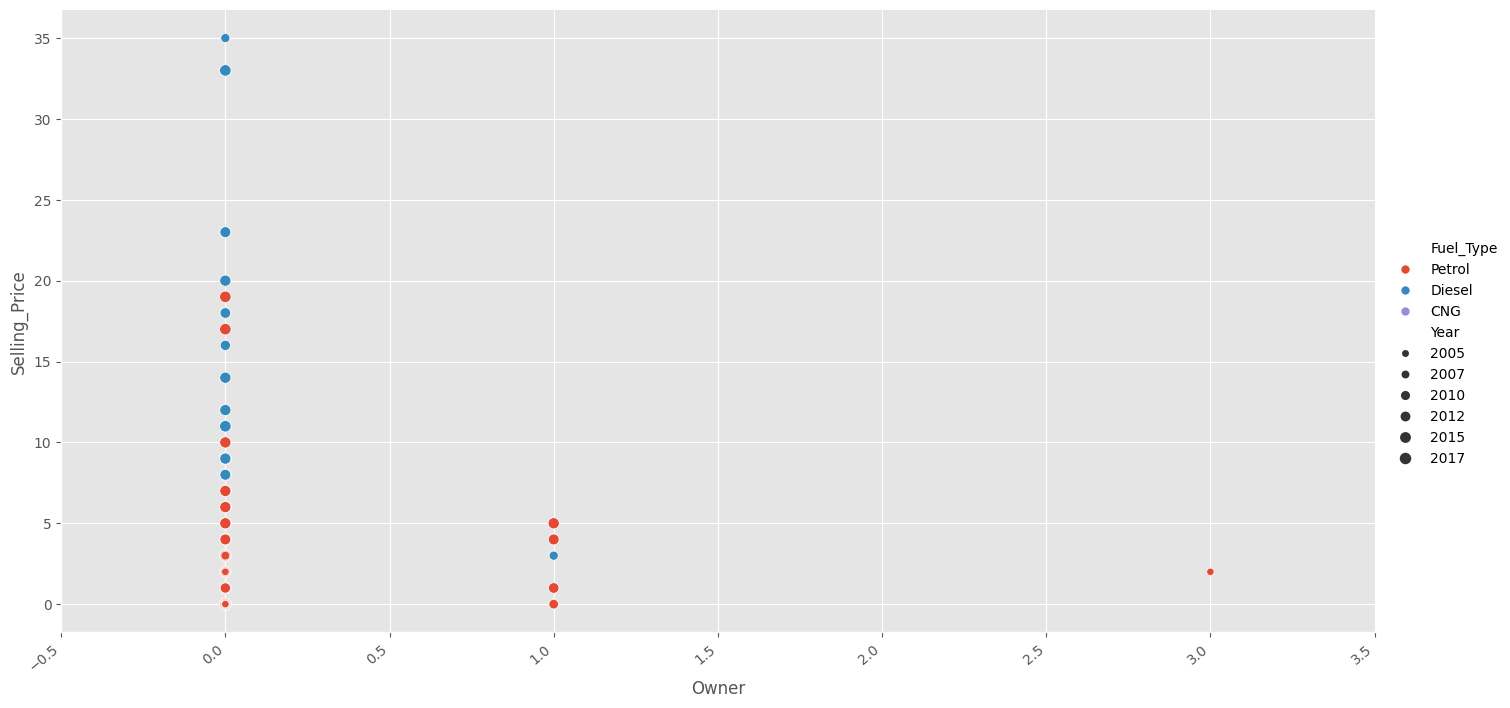

In [220]:
ax=sns.relplot(x='Owner',y='Selling_Price',data=car,hue='Fuel_Type',size='Year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [221]:
X=car[['Car_Name','Owner','Year','Driven_kms','Fuel_Type']]
y=car['Selling_Price']

In [222]:
X

,Car_Name,Owner,Year,Driven_kms,Fuel_Type
0,ritz,0,2014,27000,Petrol
1,sx4,0,2013,43000,Diesel
2,ciaz,0,2017,6900,Petrol
3,wagon r,0,2011,5200,Petrol
4,swift,0,2014,42450,Diesel
...,...,...,...,...,...
296,city,0,2016,33988,Diesel
297,brio,0,2015,60000,Petrol
298,city,0,2009,87934,Petrol
299,city,0,2017,9000,Diesel


In [223]:
y.shape

(301,)

### Applying Train Test Split

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [225]:
from sklearn.linear_model import LinearRegression

In [226]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [227]:
ohe=OneHotEncoder()
ohe.fit(X[['Car_Name','Owner','Fuel_Type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [228]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Car_Name','Owner','Fuel_Type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [229]:
lr=LinearRegression()

#### Making a pipeline

In [230]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [231]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj Avenger 150',
       'Bajaj Avenger 220', 'Bajaj Avenger Street', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar 135',
       'Bajaj Pulsar 150', 'Bajaj Pulsar 220', 'Bajaj Pulsar NS'...
       'corolla altis', 'creta', 'dzire', 'elantra', 'eon', 'ertiga',
       'etios cross', 'etios g', 'etios gd', 'etios liva', 'fortuner',
       'grand i10', 'i10', 'i20', 'ignis', 'innova', 'jazz',
       'land cruiser', 'omni', 'ritz', 's cross', 'swift', 'sx4', 'verna',
       'vitara brezza', 'wagon r', 'xcent'], dtype=object),
                                                                            array([0, 1, 3]),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object)]),
                                                  ['Car_Name', 'Owner',
                                                   'Fuel_Type'])])),
                ('linearregression', LinearRegression())])

In [232]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [233]:
r2_score(y_test,y_pred)

0.5570802684359788

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [234]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [239]:
np.argmax(scores)

332

In [240]:
scores[np.argmax(scores)]

0.9198523603877305

#### The best model is found at a certain random state

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9198523603877305

In [244]:
import pickle

In [245]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [248]:
data = np.array(['alto 800', 'First', 2019, 100, 'Petrol']).reshape(1, 5)

In [249]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj Avenger 150',
       'Bajaj Avenger 220', 'Bajaj Avenger Street', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar 135',
       'Bajaj Pulsar 150', 'Bajaj Pulsar 220', 'Bajaj Pulsar NS',
       'Bajaj Pulsar RS200', 'Bajaj ct 100', 'Hero CBZ Xtreme',
       'Hero Extreme', 'Hero Glamour', 'Hero Honda CBZ',
       'Hero Honda Passion', 'Hero Hunk', 'Hero Ignitor Disc',
       'Hero Passion Pro', 'Hero Passion X', 'Hero Splender Plus',
       'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125',
       'Honda Activa 4G', 'Honda CB Hornet', 'Honda CB Shine',
       'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister',
       'Honda CBR 150', 'Honda Dream Yuga', 'Honda Karizma',
       'Hyosung GT250R', 'KTM 390 Duke', 'KTM RC200', 'KTM RC390',
       'Mahindra Mojo XT300', 'Royal Enfield Bullet',
       'Royal Enfield Classic', 'Royal Enfield Thunder',
       'Suzuki Access 125', 'TVS Ap